In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2

# HW1 - Classification models in sklearn

You'll be building a few classifier models and using some of the tech tools we learned about in Modules 1 and 2. 

## The Data

The data is a relatively small and simple dataset of taxpayer data. I got it from:

https://www.kaggle.com/dmaillie/sample-us-taxpayer-dataset

As you'll see if you visit that page, this dataset was used in a series of YouTube tutorials on using R to build random forest models. 

I read it into a pandas dataframe and used `info()` to get:

```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   HHI             1004 non-null   int64 
 1   HHDL            1004 non-null   int64 
 2   Married         1004 non-null   int64 
 3   CollegGrads     1004 non-null   int64 
 4   AHHAge          1004 non-null   int64 
 5   Cars            1004 non-null   int64 
 6   Filed_2017      1004 non-null   int64 
 7   Filed_2016      1004 non-null   int64 
 8   Filed_2015      1004 non-null   int64 
 9   PoliticalParty  1004 non-null   object
dtypes: int64(9), object(1)
memory usage: 78.6+ KB
```

Some information about the fields:

* `HHI` - household income
* `HHDL` - household debt level
* `Married` - categorical with a few levels
* `CollegGrads` - number of college grads in the household
* `AHHAge` - average age of people in the household
* `Cars` - number of cars in the household
* `Filed_2017` - 1 means they filed a tax return with the IRS for 2017
* `Filed_2016` - 1 means they filed a tax return with the IRS for 2016
* `Filed_2015` - 1 means they filed a tax return with the IRS for 2015
* `PoliticalParty` - categorical with 3 levels

## The Problem

Our overall goal is to build classifier models to predict `PoliticalParty` using the the other variables. You must use sklearn Pipelines that contain your preprocessing steps and your model estimation step.

You can do your work in a Jupyter Notebook(s) or in a Python script(s) (i.e. a ``.py`` file) or both. It's up to you.

### Task 1

Start by creating a new project folder structure with the cookiecutter-datascience-simple template that I covered in Module 1. Put the data file into its appropriate folder and put this notebook in the main project folder. Any additional notebooks and/or Python files you end up creating should go in the main project folder. 

### Task 2

Put your new project folder under version control using git. You should **NOT** track the data file. You must track any notebooks, Python scripts or additional text files you end up creating.

### Task 3

Build at least one logistic regression model (with regularization) and one random forest model to predict `PoliticalParty`. Yes, this is very similar to what we did for the Pump it Up project in Module 2. Some detailed requirements and additional information:

* I suggest you start by reading the csv file into a pandas dataframe. My dataframe is called ``tax_df``.
* Then start with some basic EDA. You can certainly use automated tools such as pandas-profiling or SweetViz as I showed in the class notes. Remember, when you run either of those, you **must** have your notebook open in the classic Jupyter Notebook interface (and **NOT** in Jupyter Lab). Once you've created the EDA reports you can close your notebook and reopen in Jupyter Lab if you wish. As we've seen, the reports get created as HTML documents. These should go in your output folder within your project.
* Since we are using regularization, all of the numeric variables should be rescaled using the `StandardScaler` - be careful, just because a variable has a numeric datatype in the pandas dataframe, it does not mean that it's necessarily a numeric variable in the context of the classification models. Think about each column and look at your EDA reports and decide whether or not it's truly numeric or needs to be treated as categorical data in the models.
* For any variables that you decide should be treated as categorical in your models, use the `OneHotEncoder` on them in the preprocessing stage.
* Even though our target variable, `PoliticalParty`, is categorical, you do **NOT** need to do any preprocessing on it. As I mentioned in our class notes, scikit-learn will automatically detect that and will do any encoding needed on its own (it uses the `LabelEncoder`).
* I broke up the ``tax_df`` into two separate dataframes that I called ``X`` and ``y``, to use in the models. Here's my code for that:

```
X = tax_df.iloc[:, 0:9]
y = tax_df.iloc[:, 9]
```

* Please use the following code for your data partitioning so that we all end up with the same training and test split:

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
```

* For each model you fit, you should compute its ``score`` and create a confusion matrix on both train and test data. I did all of this repeatedly in the class notes.
* For each model (the logistic regression model and the random forest) you should make some summary comments about how well the model fits and predicts and if there is evidence of overfitting. 

**IMPORTANT** You always should put summary comments in a markdown cell. Do **NOT** write them as comments in a code cell. The whole point of Jupyter notebooks is to be able to mix markdown cells with code cells. If you choose to do all of your Python work in a ``.py`` file(s), then simple create a Jupyter notebook in which you include your summary comments.

#### Read in raw data

In [6]:
tax_df = pd.read_csv("./data/TaxInfo.csv")

#### Initial EDA

In [7]:
tax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   HHI             1004 non-null   int64 
 1   HHDL            1004 non-null   int64 
 2   Married         1004 non-null   int64 
 3   CollegGrads     1004 non-null   int64 
 4   AHHAge          1004 non-null   int64 
 5   Cars            1004 non-null   int64 
 6   Filed_2017      1004 non-null   int64 
 7   Filed_2016      1004 non-null   int64 
 8   Filed_2015      1004 non-null   int64 
 9   PoliticalParty  1004 non-null   object
dtypes: int64(9), object(1)
memory usage: 78.6+ KB


The summary of the dataest shows 9 of the 10 columns are numeric and 1 (Political Party) is an object.  

#### Sweetviz Report

I tried creating an EDA report using Pandas Profiling, in additon to the Sweetviz Report, but the code did not work in my favor.  Thankfully, Sweetviz worked and is saved as an html file n the output folder.  

In [8]:
import sweetviz

In [9]:
report = sweetviz.analyze(tax_df)

                                             |                                             | [  0%]   00:00 ->…

In [10]:
report.show_html("output/hw1_sweetviz_report.html")

Report output/hw1_sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Create X and y variables

In comparison to panda dataframe info, Sweetviz indicates three columms are numeric (HHI, HHDL and AHHage) and the remaining seven columns are categorical. 

In [10]:
#Create X variable for numeric columns and view data.
X = tax_df.iloc[:, 0:9]
X

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed_2017,Filed_2016,Filed_2015
0,49685,227187,0,0,105,0,1,1,1
1,64756,-507342,2,3,68,3,1,0,0
2,115435,521290,1,3,81,2,0,1,0
3,99454,251829,2,1,52,4,1,0,0
4,157274,-472337,0,1,28,1,1,0,1
...,...,...,...,...,...,...,...,...,...
999,37626,20830,0,1,38,4,0,1,0
1000,79765,63483,2,1,71,5,0,1,0
1001,111219,-573449,0,4,35,2,0,0,0
1002,105591,-611207,0,1,59,1,1,1,0


In [12]:
#Create y variable for numeric columns and view data.
y = tax_df.iloc[:, 9]
y

0          Democrat
1       Independent
2        Republican
3        Republican
4       Independent
           ...     
999        Democrat
1000     Republican
1001     Republican
1002     Republican
1003     Republican
Name: PoliticalParty, Length: 1004, dtype: object

In [27]:
#Create numeric_cols varialbe for numeric columns. View to make sure all columns are included.
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['HHI',
 'HHDL',
 'Married',
 'CollegGrads',
 'AHHAge',
 'Cars',
 'Filed_2017',
 'Filed_2016',
 'Filed_2015']

In [29]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
categorical_cols

[]

Isolating categorical variables is not needed. For this task, PoliticalParty is the predictor variable for y and does not need to be isolated.

In [30]:
all_cols = X.columns.tolist()
all_cols

['HHI',
 'HHDL',
 'Married',
 'CollegGrads',
 'AHHAge',
 'Cars',
 'Filed_2017',
 'Filed_2016',
 'Filed_2015']

In [31]:
#assert len(all_cols) == len(categorical_cols) + len(numeric_cols)

In [34]:
#Create index for numeric columns and view index values to check results.
numeric_cols_idx = [X.columns.get_loc(n) for n in numeric_cols]
numeric_cols_idx

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [35]:
#Create index for categorical columns in x and view index values to check results.
categorical_cols_idx = [X.columns.get_loc(c) for c in categorical_cols]
categorical_cols_idx

[]

In [37]:
X.iloc[:, numeric_cols_idx].nunique()

HHI            1002
HHDL           1004
Married           3
CollegGrads       6
AHHAge           88
Cars              6
Filed_2017        2
Filed_2016        2
Filed_2015        2
dtype: int64

In [36]:
X.iloc[:, categorical_cols_idx].nunique()

Series([], dtype: float64)

#### sklearn Transformer

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [39]:
# Create a StandardScalar object to use on numeric variables
numeric_transformer = StandardScaler()

In [40]:
# Create a OneHotEncoder object to use on categocial variables
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [43]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

In [44]:
# Classifier model
clf_model = LogisticRegression(penalty='l2', C=1, solver='saga', max_iter=500)

In [45]:
# Append classifier to preprocessing pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model)])

In [46]:
# sklearn diagram
from sklearn import set_config

set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['HHI', 'HHDL', 'Married',
                                                   'CollegGrads', 'AHHAge',
                                                   'Cars', 'Filed_2017',
                                                   'Filed_2016',
                                                   'Filed_2015']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [])])),
                ('classifier',
                 LogisticRegression(C=1, max_iter=500, solver='saga'))])

#### Data Partitioning and Logisitic Model

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [50]:
# Fit model on training data
clf.fit(X_train, y_train)

print("Training score: %.3f" % clf.score(X_train, y_train))
print("Test score: %.3f" % clf.score(X_test, y_test))

Training score: 0.390
Test score: 0.279


Results for the logistic model show a training score at 39% and test score at 27.9% which does not indicate a good fit of the model. The below confusion matrix shows an additional analysis regarding the accuracy of the model.

#### Confusion Matrix for Logistic Model

Confusion matrix for train, without normalization
[[110  86  71]
 [ 83 108  75]
 [ 85  90  95]]
Normalized confusion matrix for train
[[0.41198502 0.32209738 0.2659176 ]
 [0.31203008 0.40601504 0.28195489]
 [0.31481481 0.33333333 0.35185185]]


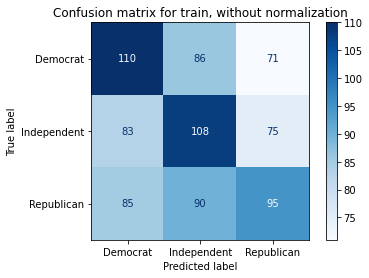

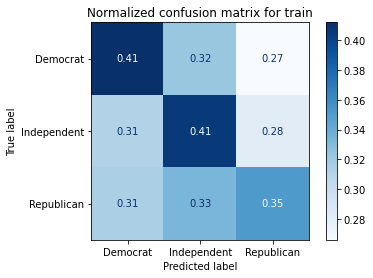

In [53]:
# Confusion matrix for training set
titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = clf['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Democrat and Independent parties were predicted correctly 41% and Republican party was correctly predicted 35%. Again, not a very strong model. 

Confusion matrix for test, without normalization
[[16 30 23]
 [28 26 17]
 [22 25 14]]
Normalized confusion matrix for test
[[0.23188406 0.43478261 0.33333333]
 [0.3943662  0.36619718 0.23943662]
 [0.36065574 0.40983607 0.2295082 ]]


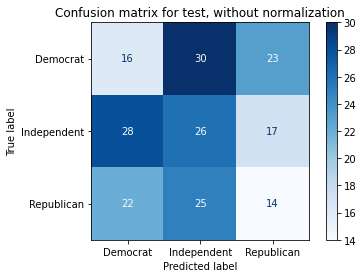

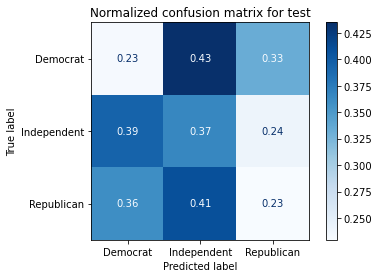

In [54]:
# Confusion matrix for test set
titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names = clf['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

For the logistic model test data, the confusion matrix does not display better results. For each polictical party, the model predictions had a higher chance of being incorret. This can sometimes happen when models are trying to predict multiple factors within a variable. If the model was searching for two poltical parties (i.e. Democrat vs Independent) it could increase the accuracy of the model. Based on the results of this model, I don't think overfitting is the main issue but it would be worth removing some variable to see the impact of model fit and accuracy.

#### Random Forest & Confusion Matrix

In [55]:
# Append random forest classifier to preprocessing pipeline.
clf_rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(oob_score=True, random_state=21))])

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2,
                                                    random_state=21)

clf_rf.fit(X_train, y_train)

print(f"Training score: {clf_rf.score(X_train, y_train):.3f}")
print(f"Test score: {clf_rf.score(X_test, y_test):.3f}")

Training score: 1.000
Test score: 0.385


For random forest, the training data scored 100% fit while the test data scrored 38.5%. In comparsion to the logistic model for the training data, the random forest model indicates possible overfittig given the perfect score for model fit. For futher review, removing some of the numeric columns with a direct correlation with PoliticalParty (maybe HHI per Sweetviz Report) or using one of the a different categorical column as the predictor could improve the model.

Confusion matrix for train, without normalization
[[211   0   0]
 [  0 209   0]
 [  0   0 222]]
Normalized confusion matrix for train
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


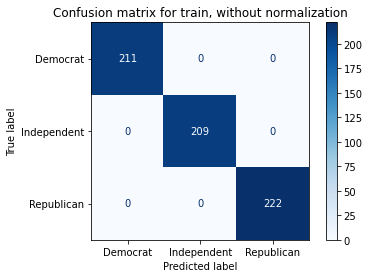

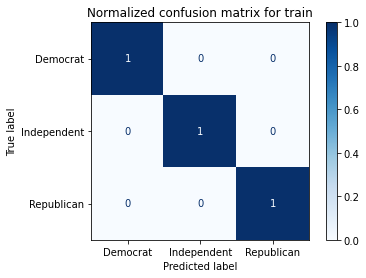

In [57]:
titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = clf_rf['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_rf, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

The above confusion matrix is consistent with the result of the random forest madel for the traning set.  Again, possible overfitting due to 100% accuracy of the model and low accruacy of the test data.

Confusion matrix for test, without normalization
[[26 15 15]
 [18 24 15]
 [10 18 20]]
Normalized confusion matrix for test
[[0.46428571 0.26785714 0.26785714]
 [0.31578947 0.42105263 0.26315789]
 [0.20833333 0.375      0.41666667]]


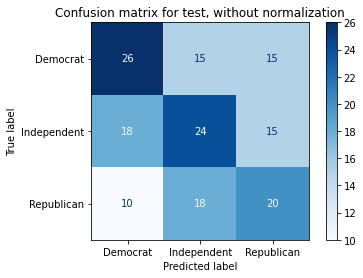

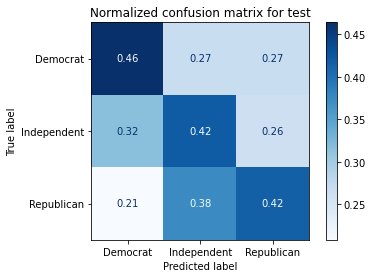

In [58]:
titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names = clf['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

The accuracy of this confusion matrix is slightly better than the results from the logistic model. I believe this to a more reasonable representation of the model's performance versus the results from the training model.   

## Optional Hacker Extra tasks
I always like to include some extra credit tasks for those who want to push themselves a little further. For this problem, consider doing one or more of the following:

* Try out the Histogram based Gradient Boosting Classifier shown in the optional materials at the end of Module 2. Compare its performance to logistic regression and the random forest.
* Create a second set of models in which you treat ``Filed_2017`` as a binary target variable and use ``PoliticalParty`` as a categorical feature variable. Is it any easier to predict ``Filed_2017`` than it was to predict ``PoliticalParty``?

## Deliverables
You should simply compress your entire project folder as either a zip file or a tar.gz file (do **NOT** ever use WinRAR to create rar files in this class). Note that when you do this, your "hidden" ``.git`` folder will get included. So, I'll be able to tell that you put the project under version control and I'll be able to look at your project folder structure. Before compressing the project folder to submit it:

* make sure all of your notebooks and .py files are in the main project folder and have good filenames,
* make sure you've committed all of your changes (git),
* upload your compressed folder in Moodle.